In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Muons

## Muon generation

In [2]:
from tomopt.muon import generate_batch

In [3]:
x = generate_batch(10000)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


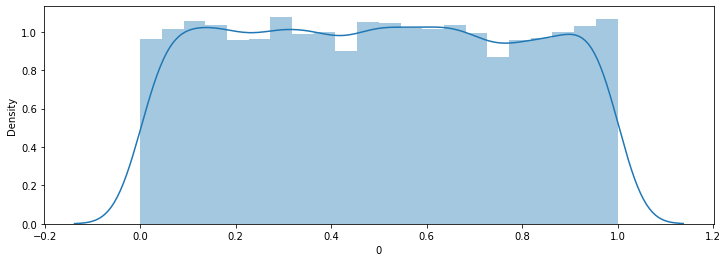

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


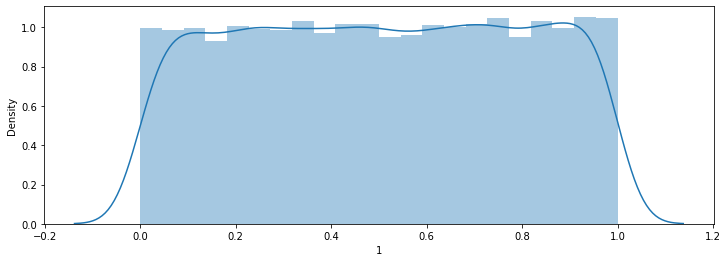

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


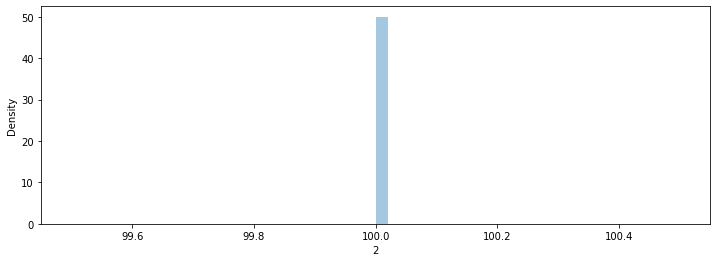

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


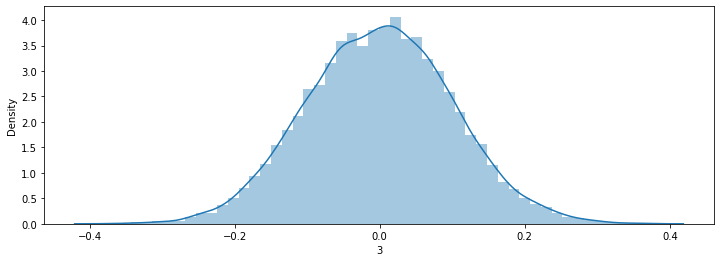

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


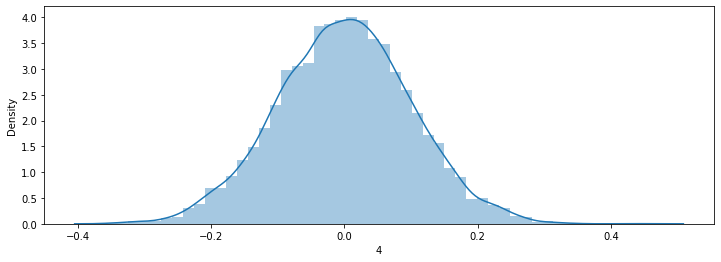

In [5]:
for i in range(x.shape[1]):
    try:
        plt.figure(figsize=(12,4))
        sns.distplot(x[:,i])
        plt.xlabel(i)
        plt.show()
    except RuntimeError:
        pass

In [6]:
m = generate_batch(100)

## Muon Batch

In [7]:
from tomopt.muon import MuonBatch

In [8]:
batch = MuonBatch(generate_batch(1000), init_z=1)

In [9]:
batch2 = MuonBatch(generate_batch(1000), init_z=1)

In [10]:
d = batch.dtheta_x(batch2); d.min(),d.max()

(tensor(3.6120e-05), tensor(0.4912))

In [11]:
d = batch.dr(batch2); d.min(),d.max()

(tensor(0.0049), tensor(0.5187))

In [12]:
batch.xy

tensor([[0.3086, 0.1891],
        [0.5219, 0.7035],
        [0.9214, 0.1480],
        ...,
        [0.8292, 0.4092],
        [0.0378, 0.0214],
        [0.7937, 0.6845]])

In [13]:
batch.snapshot_xyz()

In [14]:
batch.xy_hist

OrderedDict([(tensor([1.]),
              array([[0.30863398, 0.18911076],
                     [0.5218985 , 0.7034688 ],
                     [0.9213958 , 0.14801931],
                     ...,
                     [0.8291531 , 0.40919036],
                     [0.03779721, 0.02139878],
                     [0.7936744 , 0.6845089 ]], dtype=float32))])

In [15]:
batch.propagate(0.1)

In [16]:
batch.xy

tensor([[0.3069, 0.1988],
        [0.5152, 0.7124],
        [0.9474, 0.1532],
        ...,
        [0.8056, 0.4086],
        [0.0278, 0.0176],
        [0.7849, 0.6862]])

In [17]:
batch.xy_hist

OrderedDict([(tensor([0.9000]),
              array([[0.30863398, 0.18911076],
                     [0.5218985 , 0.7034688 ],
                     [0.9213958 , 0.14801931],
                     ...,
                     [0.8291531 , 0.40919036],
                     [0.03779721, 0.02139878],
                     [0.7936744 , 0.6845089 ]], dtype=float32))])

In [18]:
batch.snapshot_xyz()

In [19]:
batch.xy_hist

OrderedDict([(tensor([0.9000]),
              array([[0.30693373, 0.19876954],
                     [0.51518935, 0.7123711 ],
                     [0.9473719 , 0.15317374],
                     ...,
                     [0.8056468 , 0.4086492 ],
                     [0.02781764, 0.01763757],
                     [0.7849087 , 0.68615526]], dtype=float32))])

# Volume+Detector

## Volume

In [20]:
import torch
from torch import Tensor

In [21]:
from tomopt.core import X0

In [22]:
def arb_rad_length(z:float, lw:Tensor, size:float) -> float:
    rad_length = torch.ones(list((lw/size).long()))*X0['aluminium']
    if z >= 0.3 and z <= 0.6: rad_length[3:7,3:7] = X0['lead']
#     if z == 0.6 : rad_length[...] = X0['lead']
        
    return rad_length

In [23]:
d = arb_rad_length(0.6, lw=Tensor([1,1]), size=0.1);d

tensor([[0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0056, 0.0056, 0.0056, 0.0056, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0056, 0.0056, 0.0056, 0.0056, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0056, 0.0056, 0.0056, 0.0056, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0056, 0.0056, 0.0056, 0.0056, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890],
        [0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
         0.0890]])

In [24]:
x = generate_batch(10)

In [25]:
idxs = torch.floor(x[:,:2]/0.1).long()

In [26]:
d[idxs[:,0],idxs[:,1]]

tensor([0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890, 0.0890,
        0.0890])

In [27]:
from tomopt.volume import PassiveLayer, DetectorLayer

In [28]:
vl = PassiveLayer(arb_rad_length, lw=Tensor([1,1]), z=0.5, size=0.1)

In [29]:
batch = MuonBatch(generate_batch(1000), 1.0)

In [30]:
batch.xy

tensor([[0.0289, 0.1029],
        [0.1515, 0.6765],
        [0.7439, 0.2583],
        ...,
        [0.4387, 0.1481],
        [0.1911, 0.4565],
        [0.1258, 0.7731]])

In [31]:
batch.theta_x

tensor([-1.2280e-01, -1.1141e-01,  2.6298e-01,  3.5364e-02, -2.9271e-02,
         1.1484e-01, -1.7307e-01,  1.0109e-01, -1.3487e-01,  3.5321e-02,
         1.4121e-02,  1.4160e-02,  1.6950e-03, -9.6191e-02,  3.1396e-02,
         7.0143e-02,  9.7747e-02,  1.5533e-01, -2.0043e-02,  5.9076e-02,
        -1.5995e-01,  1.4997e-01, -1.0434e-01,  7.4522e-02,  2.3737e-02,
        -7.8569e-02,  1.2577e-01,  9.8484e-02, -2.3061e-01,  8.1493e-02,
         3.2312e-02,  2.5420e-01, -3.2840e-02, -2.6859e-02, -1.0656e-01,
         2.5361e-02,  4.3828e-02, -2.3971e-01,  5.8175e-02,  1.0386e-01,
         6.8928e-02, -1.3421e-01,  9.4022e-02,  1.4213e-01,  8.1331e-02,
        -3.6469e-02, -9.4017e-02,  1.2506e-01, -6.1094e-02, -1.8929e-02,
        -9.9503e-02,  5.8510e-02, -2.0509e-02,  1.7938e-01, -4.3425e-02,
         1.2999e-01, -1.2958e-02, -6.6038e-02, -2.7437e-02, -1.1482e-01,
        -2.2718e-01, -9.6458e-02,  2.5489e-02, -9.4341e-03,  9.3956e-02,
        -1.8924e-03, -1.0898e-01,  6.9111e-02, -6.2

In [32]:
batch.z

tensor([1.])

In [33]:
vl(batch)

In [34]:
batch.theta_x

tensor([-1.2280e-01, -1.1141e-01,  2.6298e-01,  3.5363e-02, -2.9270e-02,
         1.1483e-01, -1.7308e-01,  1.0108e-01, -1.3488e-01,  3.5315e-02,
         1.4124e-02,  1.4152e-02,  1.6900e-03, -9.6187e-02,  3.1408e-02,
         7.0135e-02,  9.7757e-02,  1.5533e-01, -2.0050e-02,  5.9056e-02,
        -1.5996e-01,  1.4997e-01, -1.0434e-01,  7.4526e-02,  2.3740e-02,
        -7.8579e-02,  1.2575e-01,  9.8476e-02, -2.3061e-01,  8.1491e-02,
         3.2323e-02,  2.5420e-01, -3.2843e-02, -2.6860e-02, -1.0654e-01,
         2.5354e-02,  4.3831e-02, -2.3970e-01,  5.8173e-02,  1.0386e-01,
         6.8910e-02, -1.3421e-01,  9.4009e-02,  1.4214e-01,  8.1325e-02,
        -3.6466e-02, -9.4018e-02,  1.2507e-01, -6.1134e-02, -1.8929e-02,
        -9.9500e-02,  5.8519e-02, -2.0510e-02,  1.7938e-01, -4.3439e-02,
         1.3000e-01, -1.2974e-02, -6.6037e-02, -2.7433e-02, -1.1482e-01,
        -2.2717e-01, -9.6459e-02,  2.5494e-02, -9.4397e-03,  9.3963e-02,
        -1.9129e-03, -1.0899e-01,  6.9110e-02, -6.2

In [35]:
batch.xy

tensor([[0.0166, 0.0982],
        [0.1403, 0.6612],
        [0.7708, 0.2470],
        ...,
        [0.4391, 0.1668],
        [0.2081, 0.4482],
        [0.1147, 0.7723]])

In [36]:
batch.z

tensor([0.9000])

## Detector

### Cost functions

In [37]:
import torch.nn.functional as F

In [38]:
def eff_cost(x:Tensor) -> Tensor:
    return torch.expm1(3*F.relu(x))

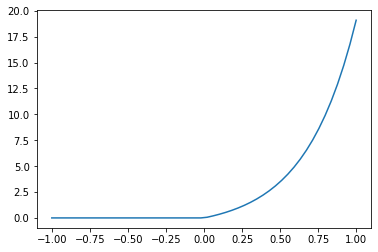

In [39]:
x = torch.linspace(-1,1,50)
plt.plot(x,eff_cost(x))

In [40]:
def res_cost(x:Tensor) -> Tensor:
    return F.relu(x/100)**2

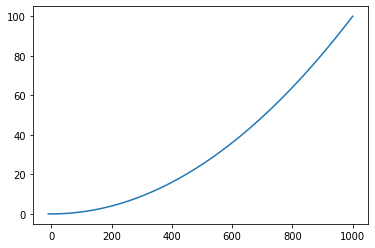

In [41]:
x = torch.linspace(-10,1000,50)
plt.plot(x,res_cost(x))

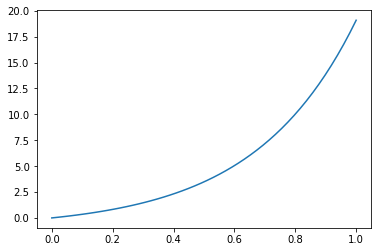

In [42]:
x = torch.linspace(0,1,50)
plt.plot(x,res_cost(x)+eff_cost(x))

### layer

In [43]:
batch = MuonBatch(generate_batch(1000), 1)

In [44]:
dl = DetectorLayer('above', 1,1,Tensor([1,1]),1,0.1, eff_cost_func=eff_cost, res_cost_func=res_cost)

In [45]:
dl.resolution

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [46]:
dl(batch)
dl(batch)
dl(batch)

In [47]:
hits = batch.get_hits(Tensor([1,1]))

In [48]:
hits['above']['xy'].shape

torch.Size([952, 3, 2])

# Volume 

In [49]:
def get_layers():
    layers = []
    lwh = Tensor([1,1,1])
    size = 0.1
    init_eff = 0.5
    init_res = 10000
    pos = 'above'
    for z,d in zip(np.arange(lwh[2],0,-size), [1,1,0,0,0,0,0,0,1,1]):
        if d:
            layers.append(DetectorLayer(pos=pos, init_eff=init_eff, init_res=init_res,
                                        lw=lwh[:2], z=z, size=size, eff_cost_func=eff_cost, res_cost_func=res_cost))
        else:
            pos = 'below'
            layers.append(PassiveLayer(rad_length_func=arb_rad_length, lw=lwh[:2], z=z, size=size))

    return nn.ModuleList(layers) 

In [50]:
import numpy as np
from torch import nn

In [51]:
layers = get_layers()

In [52]:
from tomopt.volume import Volume

In [53]:
volume = Volume(layers=layers); volume

Volume(
  (layers): ModuleList(
    (0): DetectorLayer()
    (1): DetectorLayer()
    (2): PassiveLayer()
    (3): PassiveLayer()
    (4): PassiveLayer()
    (5): PassiveLayer()
    (6): PassiveLayer()
    (7): PassiveLayer()
    (8): DetectorLayer()
    (9): DetectorLayer()
  )
)

In [54]:
volume.lw, volume.size, volume.h, volume.get_passive_z_range()

(tensor([1., 1.]), 0.1, 1.0, (tensor([0.2000]), tensor([0.8000])))

In [55]:
batch = MuonBatch(generate_batch(1000), init_z=1)

In [56]:
volume(batch)

In [57]:
hits = batch.get_hits(Tensor([1,1]))

In [58]:
hits['above']['xy'].shape

torch.Size([840, 2, 2])

In [59]:
volume.get_rad_cube().shape

torch.Size([6, 10, 10])

# Atomic number reco

## Compute deviations and scatter locations

In [60]:
from tomopt.inference import ScatterBatch

In [61]:
scatters = ScatterBatch(batch, volume)

In [62]:
scatters.location

tensor([[ 0.9419,  0.4365,  0.3421],
        [ 0.4523,  0.6271,  0.6211],
        [ 0.3338,  0.2144, -0.3679],
        ...,
        [ 0.7074,  0.1475,  0.4162],
        [ 0.5954,  0.9182,  0.7291],
        [ 0.4834,  0.2947, -0.1152]], grad_fn=<AddBackward0>)

In [63]:
scatters.location_unc

tensor([[3.3859e-02, 3.3588e-02, 2.8659e-01],
        [3.0576e-02, 1.7440e-02, 4.3106e-01],
        [3.9887e-02, 7.1538e-02, 7.7658e-01],
        ...,
        [9.6440e-04, 7.5321e-03, 1.5936e+00],
        [2.3439e-02, 1.1514e-02, 3.0613e-01],
        [1.1292e-02, 7.1554e-02, 6.4187e-01]], grad_fn=<SqrtBackward>)

In [64]:
scatters.dtheta

tensor([[2.1264e-05, 2.3249e-05],
        [1.9216e-05, 2.1773e-05],
        [1.5822e-05, 6.3652e-06],
        ...,
        [6.8545e-06, 1.6396e-05],
        [8.1415e-06, 1.4162e-05],
        [2.3240e-05, 9.8515e-06]], grad_fn=<AbsBackward>)

In [65]:
scatters.dtheta_unc

tensor([[1.2476e-05, 2.0302e-05],
        [2.1614e-05, 2.4670e-05],
        [2.2620e-05, 1.3212e-05],
        ...,
        [3.2597e-05, 2.4285e-05],
        [6.1251e-06, 1.0293e-05],
        [2.7110e-05, 2.4345e-05]], grad_fn=<SqrtBackward>)

In [66]:
scatters.dxy

tensor([[ 5.2265e-04, -4.7804e-04],
        [ 6.4162e-04,  5.6627e-04],
        [-1.9860e-04, -4.9362e-04],
        ...,
        [ 1.3661e-03, -5.7111e-04],
        [ 1.7312e-04,  9.9527e-05],
        [ 5.2812e-04,  1.2457e-03]], grad_fn=<MulBackward0>)

In [67]:
scatters.dxy_unc

tensor([[3.2378e-04, 5.0519e-04],
        [5.2955e-04, 8.8468e-04],
        [7.8765e-04, 7.8726e-04],
        ...,
        [2.1709e-03, 1.9161e-03],
        [1.9405e-04, 7.7768e-05],
        [1.7788e-03, 9.0559e-04]], grad_fn=<SqrtBackward>)

In [68]:
scatters.theta_in

tensor([[-1.1653e-03, -1.1556e-03],
        [ 7.1909e-04, -4.0703e-04],
        [ 5.2422e-04, -9.2388e-04],
        ...,
        [ 6.8307e-06,  3.8490e-05],
        [ 7.6972e-04,  3.7550e-04],
        [ 1.6351e-04,  1.1208e-03]], grad_fn=<MulBackward0>)

In [69]:
scatters.theta_in_unc

tensor([[1.0615e-05, 1.3957e-05],
        [1.9408e-05, 1.7815e-05],
        [9.8841e-06, 4.5229e-06],
        ...,
        [2.4890e-05, 1.1015e-05],
        [6.0576e-06, 7.4242e-06],
        [8.7437e-06, 1.2036e-05]], grad_fn=<SqrtBackward>)

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.49000016

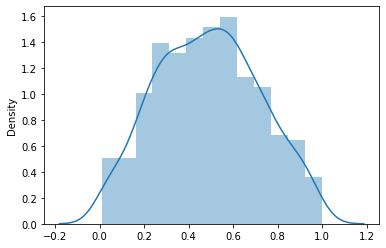

In [70]:
z = scatters.location[:,2].cpu().detach().numpy()
m = (z>0)*(z<1)
sns.distplot(z[m])
z.mean()

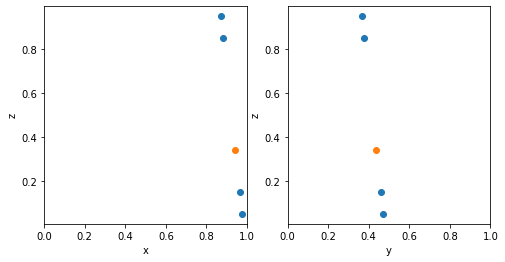

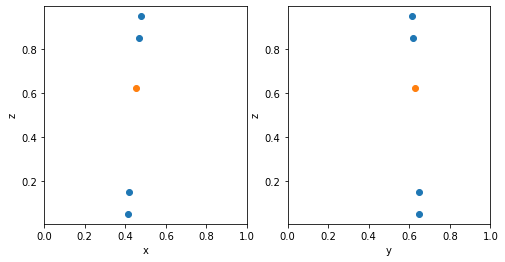

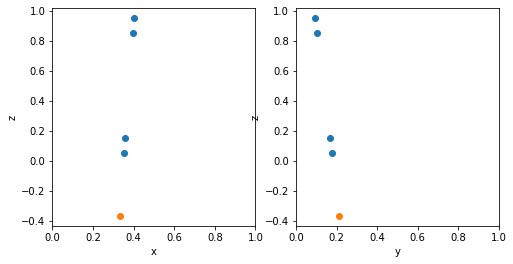

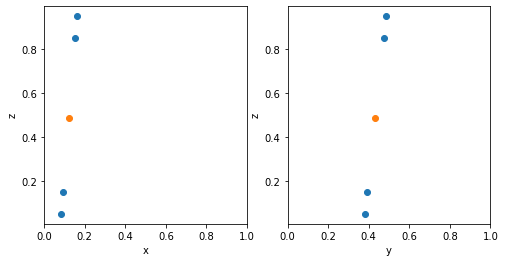

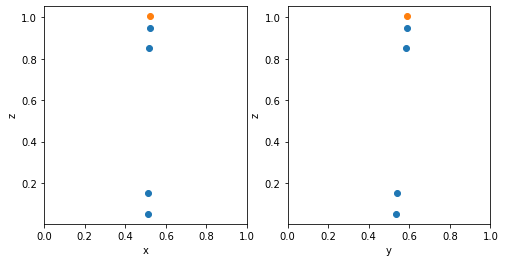

In [71]:
for i in range(5): scatters.plot_scatter(i)

## Infer rad length

In [72]:
from tomopt.inference import X0Inferer

In [73]:
x0_inferer = X0Inferer(scatters, batch)

In [74]:
pred,weight = x0_inferer.pred_x0()

In [75]:
pred

tensor([[[0.3528, 0.3528, 0.3528, 0.4328, 0.6498, 0.3528, 0.3528, 0.3528,
          2.0553, 1.0672],
         [1.1930, 0.1866, 0.3162, 0.3528, 3.4863, 0.3528, 1.8596, 0.3528,
          0.2391, 0.3528],
         [0.6008, 0.3528, 0.3528, 0.1814, 0.3528, 0.6067, 0.3528, 0.3528,
          0.3528, 1.3119],
         [0.3528, 1.3977, 0.3528, 0.5801, 0.3528, 0.1193, 0.3528, 0.3528,
          0.2368, 0.3528],
         [0.3528, 1.2706, 0.3528, 0.8499, 0.6148, 0.3528, 0.2370, 0.2049,
          1.1034, 4.1487],
         [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 4.0792, 0.3528, 0.3528,
          0.3528, 0.3528],
         [0.3528, 1.5249, 0.9772, 0.3528, 0.6746, 0.5259, 0.3689, 0.3528,
          1.3131, 0.3528],
         [0.3528, 1.2187, 1.3212, 0.3528, 1.5011, 0.3064, 0.2588, 1.0832,
          0.3528, 1.6338],
         [0.8412, 0.9577, 1.0983, 0.2449, 0.3528, 2.0360, 0.3528, 0.6150,
          0.3528, 0.7172],
         [0.3528, 0.3528, 0.8775, 0.3528, 0.3528, 0.0373, 1.1439, 0.3528,
          0.4668,

In [76]:
X0['aluminium'], X0['lead'], X0['beryllium']

(0.08897, 0.005612, 0.3528)

# Loss

In [77]:
from tomopt.loss import DetectorLoss

In [78]:
loss = DetectorLoss(1e-6)

In [79]:
loss(pred, volume)

tensor(1.8534, grad_fn=<AddBackward0>)

In [80]:
volume.get_cost()

tensor(1000348.1875, grad_fn=<AddBackward0>)